In [1]:
import glob
import xarray as xr
import netCDF4
import h5netcdf
import scipy
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
file_paths = glob.glob('/glade/derecho/scratch/geraint/NilsFSAdapt/run/NilsFSAdapt.cice.h2_01h.0001-01-0[1-3]-*') 
file_paths

['/glade/derecho/scratch/geraint/NilsFSAdapt/run/NilsFSAdapt.cice.h2_01h.0001-01-03-46800.nc',
 '/glade/derecho/scratch/geraint/NilsFSAdapt/run/NilsFSAdapt.cice.h2_01h.0001-01-02-07200.nc',
 '/glade/derecho/scratch/geraint/NilsFSAdapt/run/NilsFSAdapt.cice.h2_01h.0001-01-02-72000.nc',
 '/glade/derecho/scratch/geraint/NilsFSAdapt/run/NilsFSAdapt.cice.h2_01h.0001-01-02-03600.nc',
 '/glade/derecho/scratch/geraint/NilsFSAdapt/run/NilsFSAdapt.cice.h2_01h.0001-01-01-32400.nc',
 '/glade/derecho/scratch/geraint/NilsFSAdapt/run/NilsFSAdapt.cice.h2_01h.0001-01-03-32400.nc',
 '/glade/derecho/scratch/geraint/NilsFSAdapt/run/NilsFSAdapt.cice.h2_01h.0001-01-03-68400.nc',
 '/glade/derecho/scratch/geraint/NilsFSAdapt/run/NilsFSAdapt.cice.h2_01h.0001-01-02-32400.nc',
 '/glade/derecho/scratch/geraint/NilsFSAdapt/run/NilsFSAdapt.cice.h2_01h.0001-01-01-21600.nc',
 '/glade/derecho/scratch/geraint/NilsFSAdapt/run/NilsFSAdapt.cice.h2_01h.0001-01-02-00000.nc',
 '/glade/derecho/scratch/geraint/NilsFSAdapt/run/N

In [3]:
ds = xr.open_mfdataset(file_paths, combine='by_coords')

In [4]:
ds

<xarray.Dataset>
Dimensions:           (time: 119, nbnd: 2, nj: 480, ni: 540, nc: 5, nkice: 8,
                       nksnow: 3, nkbio: 5, nkaer: 7, nf: 12, nvertices: 4)
Coordinates:
  * time              (time) object 0001-01-01 00:30:00.000054 ... 0001-01-05...
    TLON              (nj, ni) float32 dask.array<chunksize=(480, 540), meta=np.ndarray>
    TLAT              (nj, ni) float32 dask.array<chunksize=(480, 540), meta=np.ndarray>
    ULON              (nj, ni) float32 dask.array<chunksize=(480, 540), meta=np.ndarray>
    ULAT              (nj, ni) float32 dask.array<chunksize=(480, 540), meta=np.ndarray>
    NLON              (nj, ni) float32 dask.array<chunksize=(480, 540), meta=np.ndarray>
    NLAT              (nj, ni) float32 dask.array<chunksize=(480, 540), meta=np.ndarray>
    ELON              (nj, ni) float32 dask.array<chunksize=(480, 540), meta=np.ndarray>
    ELAT              (nj, ni) float32 dask.array<chunksize=(480, 540), meta=np.ndarray>
    NCAT              (nc) float32 dask.array<chunksize=(5,), meta=np.ndarray>
    NFSD              (nf) float32 dask.array<chunksize=(12,), meta=np.ndarray>
Dimensions without coordinates: nbnd, nj, ni, nc, nkice, nksnow, nkbio, nkaer,
                                nf, nvertices
Data variables: (12/60)
    time_bounds       (time, nbnd) object dask.array<chunksize=(1, 2), meta=np.ndarray>
    VGRDi             (time, nkice) float32 dask.array<chunksize=(1, 8), meta=np.ndarray>
    VGRDs             (time, nksnow) float32 dask.array<chunksize=(1, 3), meta=np.ndarray>
    VGRDb             (time, nkbio) float32 dask.array<chunksize=(1, 5), meta=np.ndarray>
    VGRDa             (time, nkaer) float32 dask.array<chunksize=(1, 7), meta=np.ndarray>
    tmask             (time, nj, ni) float32 dask.array<chunksize=(1, 480, 540), meta=np.ndarray>
    ...                ...
    before_afsd_seco  (time, nf, nj, ni) float32 dask.array<chunksize=(1, 12, 480, 540), meta=np.ndarray>
    before_afsd_midd  (time, nf, nj, ni) float32 dask.array<chunksize=(1, 12, 480, 540), meta=np.ndarray>
    after_afsd_last_  (time, nf, nj, ni) float32 dask.array<chunksize=(1, 12, 480, 540), meta=np.ndarray>
    after_afsd_secon  (time, nf, nj, ni) float32 dask.array<chunksize=(1, 12, 480, 540), meta=np.ndarray>
    after_afsd_middl  (time, nf, nj, ni) float32 dask.array<chunksize=(1, 12, 480, 540), meta=np.ndarray>
    afsdn_h           (time, nc, nf, nj, ni) float32 dask.array<chunksize=(1, 5, 12, 480, 540), meta=np.ndarray>
Attributes:
    title:               NilsFSAdapt
    contents:            Diagnostic and Prognostic Variables
    source:              CICE Sea Ice Model, unknown_version_name
    comment:             All years have exactly 365 days
    comment2:            File written on model date 00010101
    comment3:            seconds elapsed into model date:   3600
    time_period_freq:    hour_1
    time_axis_position:  middle
    conventions:         CF-1.0
    history:             This dataset was created on 2024-10-16 at 16:56
    io_flavor:           io_pio2 cdf1

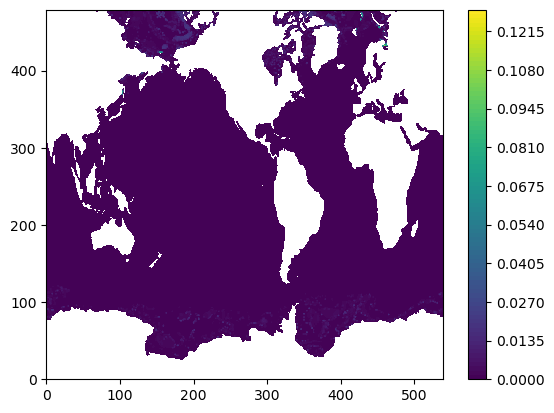

In [4]:
plt.contourf((ds.before_afsd_last[5][-1]-ds.after_afsd_last_[5][-1]),levels=100)
plt.colorbar()

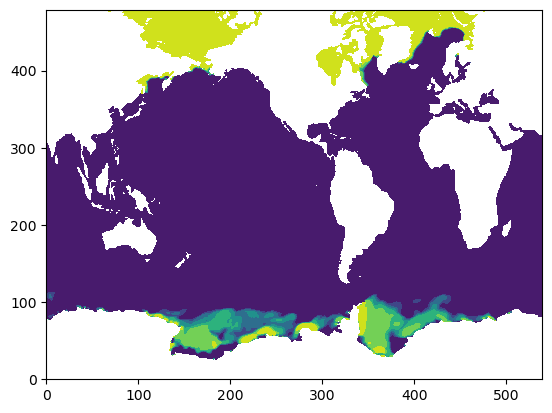

In [17]:
plt.contourf(ds.aice_h[1])

In [ ]:
afsd_h
dafsd_newi_h
dafsd_latg_h
dafsd_latm_h
dafsd_wave_h
dafsd_weld_h
dafsd_nils_h
divu_h
sst_h
wave_sig_ht_h


In [27]:
ds.fsdrad_h

<xarray.DataArray 'fsdrad_h' (time: 71, nj: 480, ni: 540)>
dask.array<concatenate, shape=(71, 480, 540), dtype=float32, chunksize=(1, 480, 540), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 0001-01-01 00:30:00.000054 ... 0001-01-03 22:30:00
    TLON     (nj, ni) float32 dask.array<chunksize=(480, 540), meta=np.ndarray>
    TLAT     (nj, ni) float32 dask.array<chunksize=(480, 540), meta=np.ndarray>
    ULON     (nj, ni) float32 dask.array<chunksize=(480, 540), meta=np.ndarray>
    ULAT     (nj, ni) float32 dask.array<chunksize=(480, 540), meta=np.ndarray>
    NLON     (nj, ni) float32 dask.array<chunksize=(480, 540), meta=np.ndarray>
    NLAT     (nj, ni) float32 dask.array<chunksize=(480, 540), meta=np.ndarray>
    ELON     (nj, ni) float32 dask.array<chunksize=(480, 540), meta=np.ndarray>
    ELAT     (nj, ni) float32 dask.array<chunksize=(480, 540), meta=np.ndarray>
Dimensions without coordinates: nj, ni
Attributes:
    units:          m
    long_name:      floe size distribution, representative radius
    cell_measures:  area: tarea
    comment:        
    cell_methods:   time: mean
    time_rep:       averaged

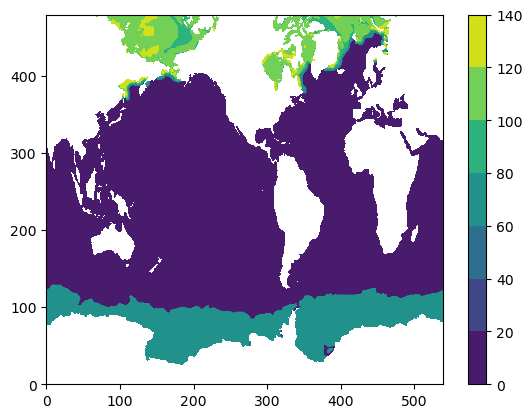

In [29]:
plt.contourf(ds.fsdrad_h[0,:,:])
plt.colorbar()

In [33]:
# Initialize empty lists to store the data
latNH=slice(460,480)
dshigh=ds.isel(nj=latNH)
ds_in = []
ds_out = []
ds_out_each=[]
# Loop over each time, nj, and ni
for t in range(1,80): # Ignore first time step ds.dims['time']
    for j in range(dshigh.dims['nj']):
        for i in range(dshigh.dims['ni']):
            #if divu>0.055: divu=0.0549
            # Check if none of the values are NaNs
            #if divu<0: divu=0
            # Extract the 12 (nf) values for each variable
            afsd_h = dshigh.afsd_h[t-1, :,j, i].values
            if not np.isnan(afsd_h).any():
                afsd_h_sum = afsd_h.sum()
                if afsd_h_sum>0.1:
                    #divu = dshigh.divu_h[t, j, i].values / 100
                    #out=dshigh.dafsd_newi_h[t, :,j, i].values+dshigh.dafsd_latg_h[t, :,j, i].values+dshigh.dafsd_latm_h[t, :,j, i].values+dshigh.dafsd_wave_h[t, :,j, i].values+dshigh.dafsd_weld_h[t, :,j, i].values+dshigh.dafsd_nils_h[t, :,j, i].values
                    #ds_in.append((afsd_h, divu, dshigh.sst_h[t, j, i].values, dshigh.wave_sig_ht_h[t, j, i].values))
                    #ds_out.append(out)
                    #ds_in.append((afsd_h, dshigh.sst_h[t, j, i].values, dshigh.wave_sig_ht_h[t, j, i].values))
                    #ds_out_each.append((dshigh.dafsd_newi_h[t, :,j, i].values, dshigh.dafsd_latg_h[t, :,j, i].values, dshigh.dafsd_latm_h[t, :,j, i].values, dshigh.dafsd_wave_h[t, :,j, i].values, dshigh.dafsd_weld_h[t, :,j, i].values, dshigh.dafsd_nils_h[t, :,j, i].values))

                    ds_in.append((afsd_h, dshigh.frzmlt_h[t, j, i].values,dshigh.sst_h[t-1, j, i]))
                    ds_out.append(dshigh.dafsd_latg_h[t, :,j, i].values+dshigh.dafsd_latm_h[t, :,j, i].values)


KeyboardInterrupt: 

In [25]:
dshigh.afsd_h

<xarray.DataArray 'afsd_h' (time: 71, nf: 12, nj: 20, ni: 540)>
dask.array<getitem, shape=(71, 12, 20, 540), dtype=float32, chunksize=(1, 12, 20, 540), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 0001-01-01 00:30:00.000054 ... 0001-01-03 22:30:00
    TLON     (nj, ni) float32 dask.array<chunksize=(20, 540), meta=np.ndarray>
    TLAT     (nj, ni) float32 dask.array<chunksize=(20, 540), meta=np.ndarray>
    ULON     (nj, ni) float32 dask.array<chunksize=(20, 540), meta=np.ndarray>
    ULAT     (nj, ni) float32 dask.array<chunksize=(20, 540), meta=np.ndarray>
    NLON     (nj, ni) float32 dask.array<chunksize=(20, 540), meta=np.ndarray>
    NLAT     (nj, ni) float32 dask.array<chunksize=(20, 540), meta=np.ndarray>
    ELON     (nj, ni) float32 dask.array<chunksize=(20, 540), meta=np.ndarray>
    ELAT     (nj, ni) float32 dask.array<chunksize=(20, 540), meta=np.ndarray>
    NFSD     (nf) float32 dask.array<chunksize=(12,), meta=np.ndarray>
Dimensions without coordinates: nf, nj, ni
Attributes:
    units:          1/m
    long_name:      areal floe size distribution
    cell_measures:  area: tarea
    comment:        per unit bin width
    cell_methods:   time: mean
    time_rep:       averaged

In [34]:
ds_in[0]

(array([9.3161985e-02, 1.3914478e-02, 5.3080148e-03, 2.5175042e-03,
        1.3044926e-03, 7.0190220e-04, 3.1993169e-04, 1.8356845e-04,
        9.9326389e-05, 6.6389526e-05, 2.1353360e-05, 5.2410358e-04],
       dtype=float32),
 array(3748.7693, dtype=float32),
 <xarray.DataArray 'sst_h' ()>
 dask.array<getitem, shape=(), dtype=float32, chunksize=(), chunktype=numpy.ndarray>
 Coordinates:
     time     object 0001-01-01 00:30:00.000054
     TLON     float32 dask.array<chunksize=(), meta=np.ndarray>
     TLAT     float32 dask.array<chunksize=(), meta=np.ndarray>
     ULON     float32 dask.array<chunksize=(), meta=np.ndarray>
     ULAT     float32 dask.array<chunksize=(), meta=np.ndarray>
     NLON     float32 dask.array<chunksize=(), meta=np.ndarray>
     NLAT     float32 dask.array<chunksize=(), meta=np.ndarray>
     ELON     float32 dask.array<chunksize=(), meta=np.ndarray>
     ELAT     float32 dask.array<chunksize=(), meta=np.ndarray>
 Attributes:
     units:          C
     long_na

In [35]:

    # Flatten each tuple in ds_in into a single array of numbers
    flattened_ds_in = [np.concatenate([arr.flatten() if isinstance(arr, np.ndarray) else np.array([arr]) for arr in tup]) for tup in ds_in]
    # Example of how to access the first flattened array
    print(len(flattened_ds_in))
    print(len(ds_in))
    

4938
4938


In [24]:
#Just Lat Melt
ds_in_lat_melt=np.array([])
for i in range(len(ds_in)):
    np.append(ds_in_lat_melt,ds_in[i][:12])
    np.append(ds_in_lat_melt[i],ds_in[i][13])

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (3,) + inhomogeneous part.

In [9]:
# Calculate the orders of magnitude difference
def calculate_orders_of_magnitude_difference(predictions, actuals):
    differences = torch.abs(predictions - actuals)
    orders_of_magnitude_diff = torch.log10(differences + 1e-10) - torch.log10(torch.abs(actuals) + 1e-10)
    return torch.mean(torch.abs(orders_of_magnitude_diff))

In [36]:
import torch
from sklearn.model_selection import train_test_split

import torch.nn as nn
import torch.optim as optim

# Convert data to PyTorch tensors
flattened_ds_in_tensor = torch.tensor(flattened_ds_in, dtype=torch.float32)
ds_out_tensor = torch.tensor(ds_out, dtype=torch.float32)
X_train, X_test, y_train, y_test = train_test_split(flattened_ds_in_tensor, ds_out_tensor, test_size=0.2, random_state=42)
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Define the neural network architecture
class PhysicsInformedNN(nn.Module):
    def __init__(self):
        super(PhysicsInformedNN, self).__init__()
        self.hidden1 = nn.Linear(X_train.shape[1], 128)
        self.hidden2 = nn.Linear(128, 64)
        self.hidden3 = nn.Linear(64, 32)
        self.output = nn.Linear(32, y_train_tensor.shape[1])
    
    def forward(self, x):
        x = torch.relu(self.hidden1(x))
        x = torch.relu(self.hidden2(x))
        x = torch.relu(self.hidden3(x))
        x = self.output(x)
        return x

# Initialize the model, loss function, and optimizer
model = PhysicsInformedNN()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Custom loss function to enforce the sum of outputs to be zero
def custom_loss(output, target):
    mse_loss = criterion(output, target)
    sign_penalty = 0
    for i in range(output.shape[1]):
        sign_penalty += torch.mean(torch.relu(-output[:, i] * torch.sign(target[:, i])))
    sign_penalty = sign_penalty / output.shape[1]
    
    sign_loss=sign_penalty**2

    
    # Compare the signs of the predicted and actual outputs
    #predicted_signs = torch.sign(output)
    #actual_signs = torch.sign(target)
    
    # Count the number of different signs
    #negative_sign_differences=0
    #negative_sign_differences += torch.sum(predicted_signs != actual_signs).item()
    #sign_loss = negative_sign_differences/(len(output)*len(output[0]))**2
    
    sign_penalty = torch.mean(torch.abs(torch.sign(output) - torch.sign(target)))
    #total_loss = mse_loss + 0.5*sign_penalty**2
    return [mse_loss,10*sign_loss]

# Training loop
num_epochs = 3000
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = custom_loss(outputs, y_train_tensor)
    loss_back=loss[0]+loss[1]
    loss_back.backward()
    optimizer.step()
    
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], MSE Loss: {loss[0].item():.20f}, Sign Loss: {loss[1].item():.20f}')
        
    if (epoch+1) % 500 ==0:
        negative_sign_differences = 0

        for i in range(len(flattened_ds_in)):
            predicted_output = model(torch.tensor(flattened_ds_in[i], dtype=torch.float32))
            actual_output = ds_out_tensor[i]
    
            # Compare the signs of the predicted and actual outputs
            predicted_signs = torch.sign(predicted_output)
            actual_signs = torch.sign(actual_output)
    
        # Count the number of different signs
            negative_sign_differences += torch.sum(predicted_signs != actual_signs).item()

        print(f'Total number of different negative signs: {negative_sign_differences} As a %: {100*negative_sign_differences/(len(flattened_ds_in)*len(flattened_ds_in[0]))}')
        print('Orders of mag. different on average: ' + str(calculate_orders_of_magnitude_difference(predicted_output, actual_output).item()))
# Evaluate the model
model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor)
    mse = criterion(predictions, y_test_tensor)
    print(f'Test Mean Squared Error: {mse.item():.20f}')

/glade/derecho/scratch/geraint/tmp/ipykernel_37171/3689535058.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
/glade/derecho/scratch/geraint/tmp/ipykernel_37171/3689535058.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
/glade/derecho/scratch/geraint/tmp/ipykernel_37171/3689535058.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
/glade/derecho/scratc

Epoch [100/3000], MSE Loss: 0.16778737306594848633, Sign Loss: 0.00056540640071034431
Epoch [200/3000], MSE Loss: 0.00727315852418541908, Sign Loss: 0.00044987810542806983
Epoch [300/3000], MSE Loss: 0.00330393528565764427, Sign Loss: 0.00122408336028456688
Epoch [400/3000], MSE Loss: 0.00323419948108494282, Sign Loss: 0.00117955112364143133
Epoch [500/3000], MSE Loss: 0.00307642691768705845, Sign Loss: 0.00115484406705945730
Total number of different negative signs: 21777 As a %: 31.50060753341434
Orders of mag. different on average: 8.806347846984863
Epoch [600/3000], MSE Loss: 0.00307393842376768589, Sign Loss: 0.00120963389053940773
Epoch [700/3000], MSE Loss: 0.00297704641707241535, Sign Loss: 0.00116590363904833794
Epoch [800/3000], MSE Loss: 0.00287568382918834686, Sign Loss: 0.00112489075399935246
Epoch [900/3000], MSE Loss: 0.00277273869141936302, Sign Loss: 0.00108241243287920952
Epoch [1000/3000], MSE Loss: 0.00266580190509557724, Sign Loss: 0.00104303157422691584
Total numb

In [37]:
k=2000
print(model(torch.tensor(flattened_ds_in[k], dtype=torch.float32)))
print(flattened_ds_in[k])
print(ds_out_tensor[k])

tensor([ 5.8306e-03,  6.0139e-03,  2.5844e-05, -4.2791e-02,  4.6490e-06,
         2.3716e-05,  2.9620e-04, -2.9931e-02,  6.1702e-02,  1.2996e-02,
         1.4049e-03,  2.3738e-06], grad_fn=<ViewBackward0>)
[ 9.31907818e-02  1.39209153e-02  5.31998230e-03  2.53274408e-03
  1.32271100e-03  7.22168654e-04  3.48821050e-04  2.06326833e-04
  1.19840945e-04  8.75257101e-05  2.71360423e-05  4.54370427e-04
  2.29667822e+03 -1.79942703e+00]
tensor([3.6003e-10, 1.3953e-10, 2.1111e-11, 7.5792e-12, 3.3922e-12, 1.6735e-12,
        8.7877e-13, 3.9362e-13, 2.2152e-13, 1.1213e-13, 9.9222e-14, 3.0736e-13])


In [18]:
# Calculate the amount of different negative signs compared to the actual output ds_out_tensor
negative_sign_differences = 0

for i in range(len(flattened_ds_in)):
    predicted_output = model(torch.tensor(flattened_ds_in[i], dtype=torch.float32))
    actual_output = ds_out_tensor[i]
    
    # Compare the signs of the predicted and actual outputs
    predicted_signs = torch.sign(predicted_output)
    actual_signs = torch.sign(actual_output)
    
    # Count the number of different signs
    negative_sign_differences += torch.sum(predicted_signs != actual_signs).item()

print(f'Total number of different negative signs: {negative_sign_differences} As a %: {100*negative_sign_differences/(len(flattened_ds_in)*len(flattened_ds_in[0]))}')

Total number of different negative signs: 1264 As a %: 3.6317664636248708


In [32]:
# Evaluate the model on the test set
model.eval()
with torch.no_grad():
    test_predictions = model(X_test_tensor)
    avg_orders_of_magnitude_diff = calculate_orders_of_magnitude_difference(test_predictions, y_test_tensor)
    print(f'Average Orders of Magnitude Difference: {avg_orders_of_magnitude_diff.item():.6f}')

Average Orders of Magnitude Difference: 6.997536


In [ ]:
tensor_example = torch.tensor([1, 2])
print(tensor_example)

In [38]:
import csv

# Define the file path
csv_file_path = 'ds_in.csv'

# Open the file in write mode
with open(csv_file_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    # Write the header
    writer.writerow(['afsd_h', 'frzmlt_h', 'sst_h'])
    
    # Write the data
    for row in ds_in:
        afsd_h_str = ','.join(map(str, row[0]))
        writer.writerow([afsd_h_str, row[1], row[2].values])

In [39]:
# Define the file path for ds_out
csv_file_path_ds_out = 'ds_out.csv'

# Open the file in write mode
with open(csv_file_path_ds_out, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    # Write the header
    writer.writerow(['ds_out'])
    
    # Write the data
    for row in ds_out:
        ds_out_str = ','.join(map(str, row))
        writer.writerow([ds_out_str])